
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The selected data set is No-Show Appointemenets where I can focus on the paients showed up or not showed up to their appointements, this data set conatins detailed information about the age where I can create categorical variable to represent the age stage, and I can analyse the correltaion between the show up to appointment and age stages, I focused on two questions in my analyze:

1- What is the affect of the patient age range in not show up for scheduled appointment?

2- What is the age distribution of patients (early adult) did not show up to their appointemnt? 


In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import csv
import datetime 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

%matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning (Replace this with more specific notes!)

After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

I need the folowing fields in order to answer my two questions: PatientId, ScheduledDay, AppointmentDay, Age, No-show
I will clean the data as per the follwing steps: 
> **1** remove the time from ScheduledDay exmaple 2016-04-29T18:38:08Z will be after cleaning 2016-04-29

> **2** remove the time from AppointmentDay exmaple 2016-04-29T00:00:00Z will be after cleaning 2016-04-29

> **3** rename the column No-show to No_Show

> **4** there are certain outliers or errors. Age has a value of -1 and certain values of 0. I will remove the -1 and 0 values,

> **5** for question1, I created new column 'AgeStage' to represent the categories stage of patients



In [7]:
# clean the data set

# rename the column No-show
new_labels=list(df.columns)
new_labels[13]='No_Show'
df.columns=new_labels
df.dropna(inplace = True) 
#remove the time from ScheduledDay
df['ScheduledDay']=df['ScheduledDay'].str.split('T',n=1,expand = True)
#remove the time from AppointmentDay
df['AppointmentDay']=df['AppointmentDay'].str.split('T',n=1,expand = True)
# remove the Age has a value of 0.
indexes=df[df['Age']==0].index
df.drop(indexes, inplace=True)
# remove the Age has a value of -1
indexes=df[df['Age']==-1].index
df.drop(indexes, inplace=True)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

The 1st Question: 

What is the affect of the patient age range in not show up for scheduled appointment?

my answer: In the human lifespan, there are six life stages.

1). Infancy = 0-2 years.

2). Early Childhood = 3-8 years.

3). Adolescence = 9-18 years.

4). Early Adulthood = 19-45 years.

5). Middle Adulthood = 46-65 years.

6). Later Adulthood = 65+ years.


I created the categorical list of stages then I created the column of AgeStage
I will compare between the categorical values of Age stages using the Bar Chart, I have one variable per item and few items.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,AgeStage
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Middle Adulthood
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle Adulthood
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Middle Adulthood
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Early Childhood
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle Adulthood


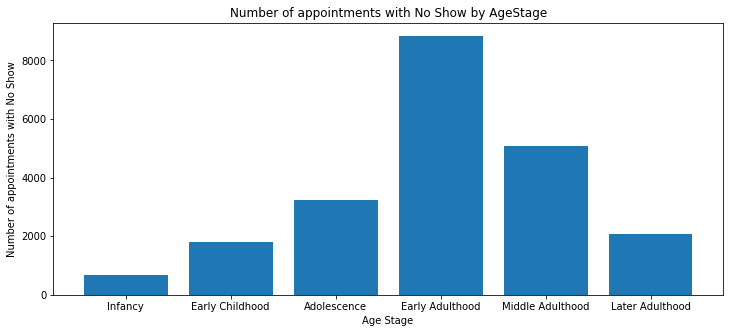

In [8]:

bin_names=['Infancy','Early Childhood','Adolescence','Early Adulthood','Middle Adulthood','Later Adulthood']
bin_edges=[-1,2,8,18,45,65,115] 
df['AgeStage']= pd.cut(df['Age'], bin_edges, labels=bin_names)

df1=df.groupby(['AgeStage','No_Show'])['AppointmentID'].count()

no_show_values=[df1[1],df1[3],df1[5],df1[7],df1[9],df1[11]]
df2=no_show_values
locations=[1,2,3,4,5,6]
labels=bin_names
heights=no_show_values
plt.figure(figsize=(12,5)) 
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of appointments with No Show by AgeStage')
plt.xlabel('Age Stage')
plt.ylabel('Number of appointments with No Show');
df.head()

>**My Analysis**
Depending on the result I found that the people who are early adulthood 19-45 years, they do not show up for their appointement
more than other poeple of other human stages.

### Research Question 2  (Replace this header name!)

The 2nd Question: 
What is the age distribution of patients (early adult) did not show up to their appointemnt? 

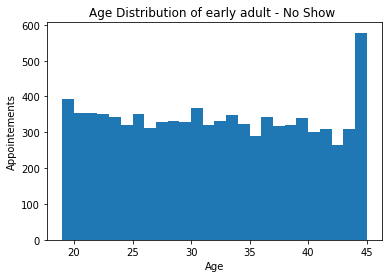

In [16]:
indexes=df[df['AgeStage']!='Early Adulthood'].index
df.drop(indexes, inplace=True)
indexes=df[df['No_Show']!='Yes'].index
df.drop(indexes, inplace=True)
plt.hist(df['Age'], bins=26)
plt.title("Age Distribution of early adult - No Show ")
plt.xlabel("Age")
plt.ylabel("Appointements")
plt.show()



>**My Analysis**
The shape of histogram is very close to be Uniform which provides a little information but I see that the number of appointements (patients) is close to be equal in all ages year except the age 43, 44


<a id='conclusions'></a>
## Limitations
> The data was enough to answer the two selected questions but there is some limitations faced me during the analysis, I found some wrong values in the data set for example there are certain outliers or errors. Age = -1, 0.

## Conclusions
> The people who are early adulthood 19-45 years, they do not show up for their appointement more than other poeple of other human stages.

> The shape of Age histogram is very close to be Uniform, I see that the number patients is close to be equal in all ages year except the age 43, 44


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [13]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0